<a href="https://www.kaggle.com/code/shariq20220/binary-prediction-of-poisonous-mushrooms?scriptVersionId=192670584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

# import mplcursors  ## for hovering in graphs and getting value
warnings.filterwarnings('ignore')

## Checking availability of Datasets

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print("dirname:" , dirname)
    if len(filenames) == 0 :
        print("no file in the directory!! Please add a dataset ")  
        
    else:
        for filename in filenames:
            print(os.path.join(dirname, filename))
        
       
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dirname: /kaggle/input
no file in the directory!! Please add a dataset 
dirname: /kaggle/input/playground-series-s4e8
/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


## Loading Datasets

In [3]:
data_train=pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
data_test=pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")
data_sample_sub=pd.read_csv("/kaggle/input/playground-series-s4e8/sample_submission.csv")

## EDA on Training Dataset


In [4]:
data_train.shape

(3116945, 22)

In [5]:
data_train.head(20)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,...,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,...,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [7]:
data_train.describe(include = 'all')

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,3.116945e+06,3116945,3.116941e+06,3116905,2445922,3116933,3116937,2593009,1858510,3116888,...,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,NaN,2,NaN,74,83,78,26,78,48,63,...,38,60,59,22,24,23,40,32,52,4
top,NaN,p,NaN,x,t,n,f,a,c,w,...,b,s,w,u,w,f,f,k,d,a
freq,NaN,1705396,NaN,1436026,460777,1359542,2569743,646034,1331054,931538,...,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321
mean,1.558472e+06,NaN,6.309848e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657931e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

## EDA on Testing Dataset

In [9]:
data_test.shape

(2077964, 21)

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


## EDA on Sample_submission Dataset

In [11]:
data_sample_sub.shape

(2077964, 2)

# Pre-Processing Datasets

In [12]:
data_train2 = data_train.copy()
data_train2 = data_train.drop_duplicates()
data_train2.shape

(3116945, 22)

In [13]:
data_train2.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [14]:
data_train2.isna().mean()*100

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

In [15]:
miss70 = data_train2.isna().mean()*100
miss70[miss70>70]

stem-root            88.452732
veil-type            94.884350
veil-color           87.936970
spore-print-color    91.425482
dtype: float64

In [16]:
classes_with_id = data_train2[['id','class']]
classes_with_id.shape

(3116945, 2)

In [17]:
data_test2 = data_test.copy()
data_test2 = data_test.drop_duplicates()
data_test2.shape

(2077964, 21)

In [18]:
data_train2  = data_train2.drop(columns = {'id','stem-root','class','veil-type','veil-color','spore-print-color'}, axis =1)
print(data_train2.shape)
data_test2 = data_test2.drop(columns={'id','stem-root','veil-type','veil-color','spore-print-color'}, axis =1)
print(data_test2.shape)

(3116945, 16)
(2077964, 16)


In [19]:
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-surface          object 
 11  stem-color            object 
 12  has-ring              object 
 13  ring-type             object 
 14  habitat               object 
 15  season                object 
dtypes: float64(3), object(13)
memory usage: 380.5+ MB


In [20]:
data_train2.isnull().sum()

cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-surface            1980861
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
season                        0
dtype: int64

In [21]:
data_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-surface          object 
 11  stem-color            object 
 12  has-ring              object 
 13  ring-type             object 
 14  habitat               object 
 15  season                object 
dtypes: float64(3), object(13)
memory usage: 253.7+ MB


In [22]:
data_test2.isnull().sum()

cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-surface            1321488
stem-color                   21
has-ring                     19
ring-type                 86195
habitat                      25
season                        0
dtype: int64

In [23]:
train2_shape = data_train2.shape
test2_shape  = data_test2.shape
train2_shape,test2_shape,train2_shape[0],test2_shape[0]

((3116945, 16), (2077964, 16), 3116945, 2077964)

## Combining both train and test datasets for easier processing

In [24]:
com_data = pd.concat([data_train2,data_test2],ignore_index = True)
com_data

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,NaN,e,f,f,d,u
5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,NaN,w,f,f,g,a
5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,NaN,y,t,z,d,a
5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,s,g,f,f,d,a


In [25]:
com_data.shape

(5194909, 16)

In [26]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194909 entries, 0 to 5194908
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-surface          object 
 11  stem-color            object 
 12  has-ring              object 
 13  ring-type             object 
 14  habitat               object 
 15  season                object 
dtypes: float64(3), object(13)
memory usage: 634.1+ MB


In [27]:
com_data.describe(include = [np.number])

,cap-diameter,stem-height,stem-width
count,5.194898e+06,5.194908e+06,5.194909e+06
mean,6.308386e+00,6.347604e+00,1.115162e+01
std,4.668963e+00,2.699444e+00,8.097359e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.740000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.562000e+01
max,6.070000e+02,8.872000e+01,1.029100e+02


In [28]:
com_data.describe(include = ['object'])

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
count,5194838,4076982,5194884,5194891,4321152,3096879,5194803,1892560,5194850,5194866,4979834,5194839,5194909
unique,108,114,109,29,117,66,86,87,88,26,47,65,4
top,x,t,n,f,a,c,w,s,w,f,f,d,a
freq,2393975,767629,2263849,4283405,1076994,2218030,1552311,546106,1994002,3946912,4127370,3627993,2572406


In [29]:
com_data.isna().sum()

cap-diameter                 11
cap-shape                    71
cap-surface             1117927
cap-color                    25
does-bruise-or-bleed         18
gill-attachment          873757
gill-spacing            2098030
gill-color                  106
stem-height                   1
stem-width                    0
stem-surface            3302349
stem-color                   59
has-ring                     43
ring-type                215075
habitat                      70
season                        0
dtype: int64

cap-diameter


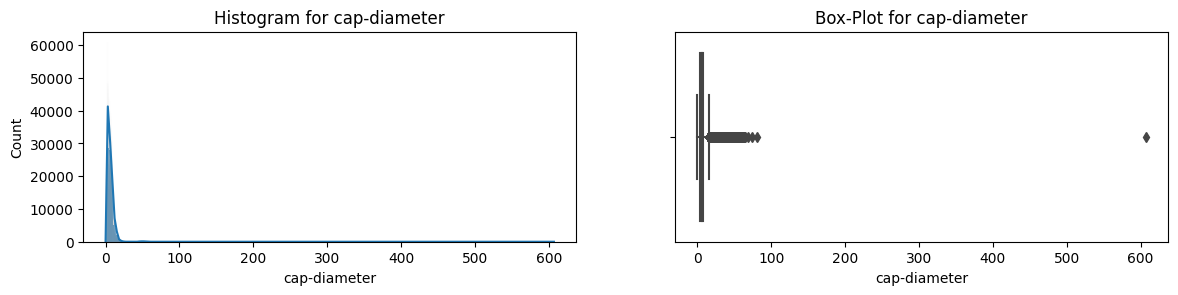

stem-height


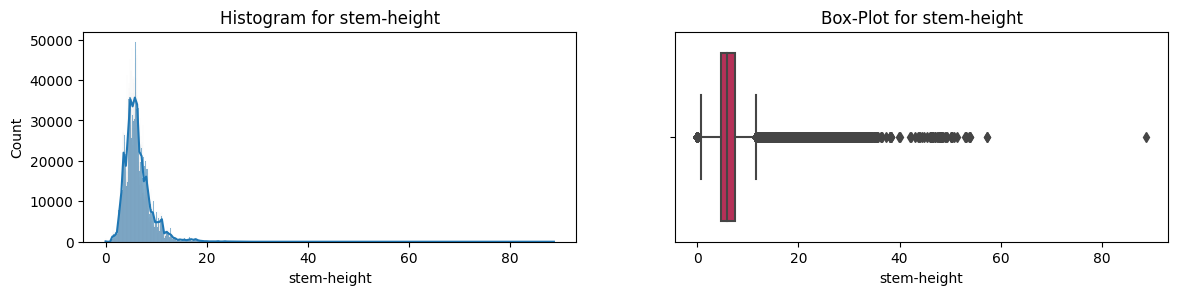

stem-width


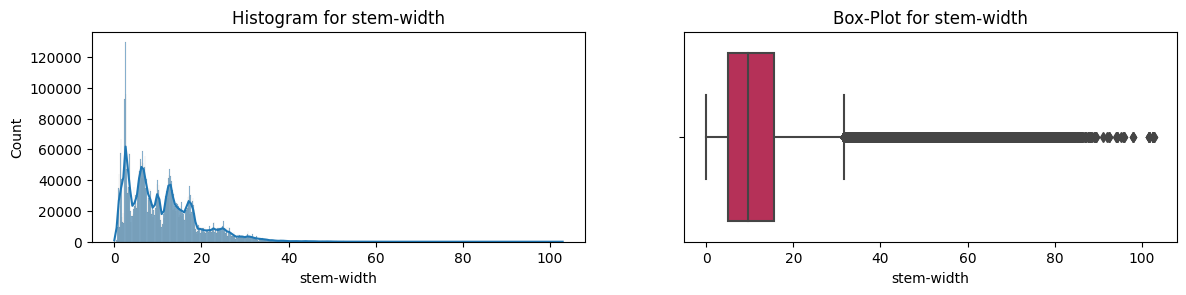

In [30]:
for column in com_data.select_dtypes(include = [np.number]).columns:
    print(column)
    
    plt.figure(figsize=(14,6))
    plt.tight_layout()
    
    plt.subplot(2,2,1)
    sns.histplot(data = com_data[f'{column}'],kde = True, palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.axis()
    plt.title(f'Histogram for {column}')
    
    plt.subplot(2,2,2)
    sns.boxplot(data = com_data,x=com_data[f'{column}'],width = 0.8,palette = 'rocket',color = 'red')
    plt.xlabel(f'{column}')
    plt.title(f'Box-Plot for {column}')
    
    plt.show()

In [31]:
# import plotly.express as px

In [32]:
# for column in com_data.select_dtypes(include = [np.number]).columns:
#     print(column)
    
#     # Create a histogram with KDE overlay
#     fig = px.histogram(data_frame = com_data,
#                        x = column,
#                        marginal="violin", # Adds a KDE/violin plot on the side
#                        opacity=0.3,
#                        title='Histogram with KDE')

#     # Update layout for clarity
#     fig.update_layout(
#         xaxis_title= f'{column}',
#         yaxis_title='Count',
#         bargap=0.2,
#         showlegend=True
#     )

#     # Show the plot
#     fig.show()
    
    
    
#     fig2 =  px.box(data_frame = com_data, x = column,notched = True,orientation = 'h')
#     fig2.update_layout(xaxis_title = f'{column}',
#                        yaxis_title = 'Value',
#                        showlegend = True
#                       )
    
    
#     fig2.show()

cap-shape


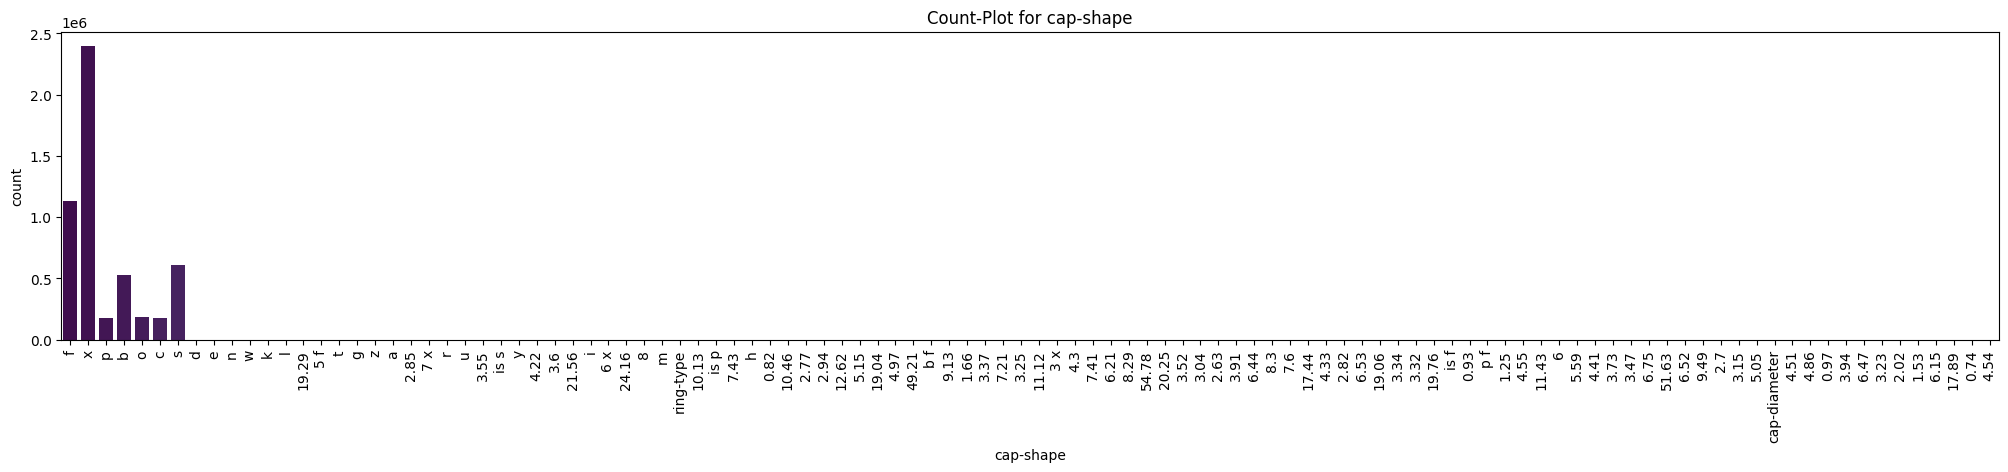

cap-surface


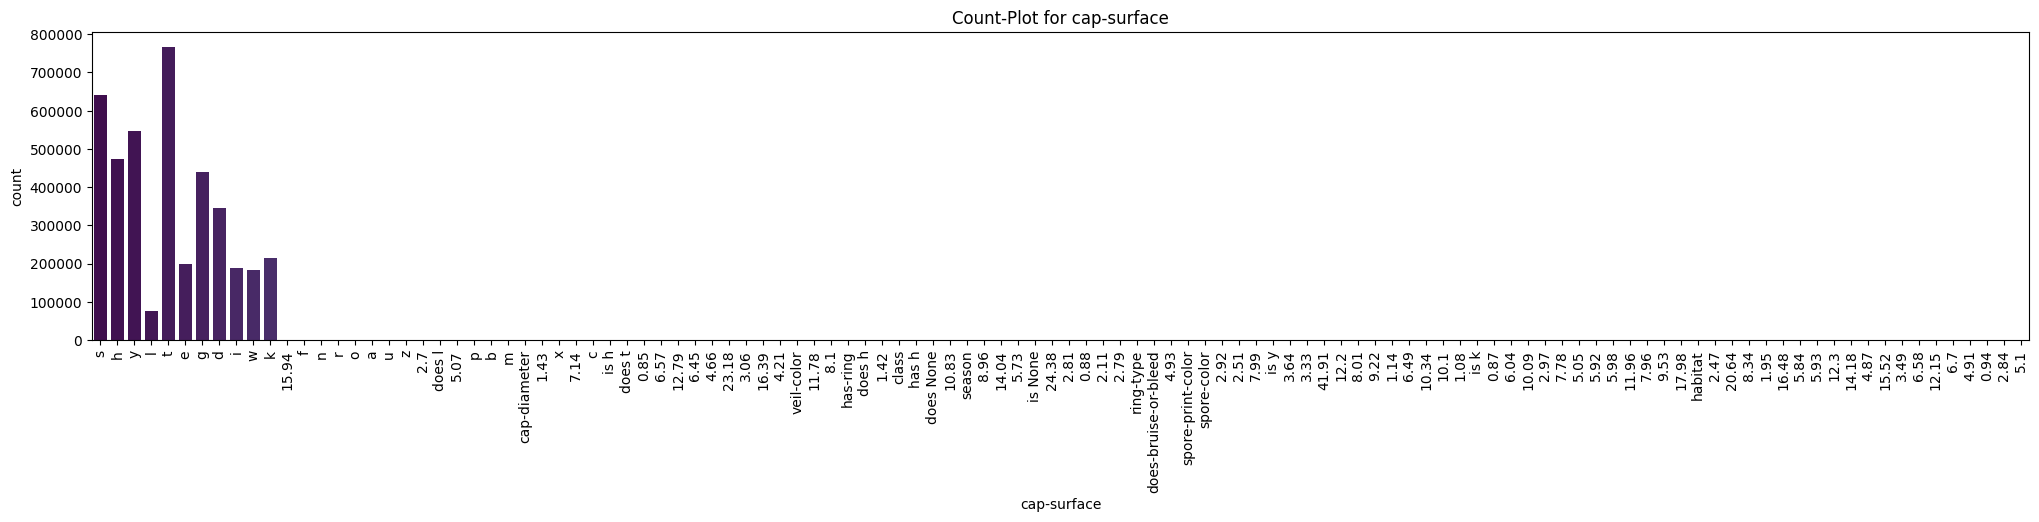

cap-color


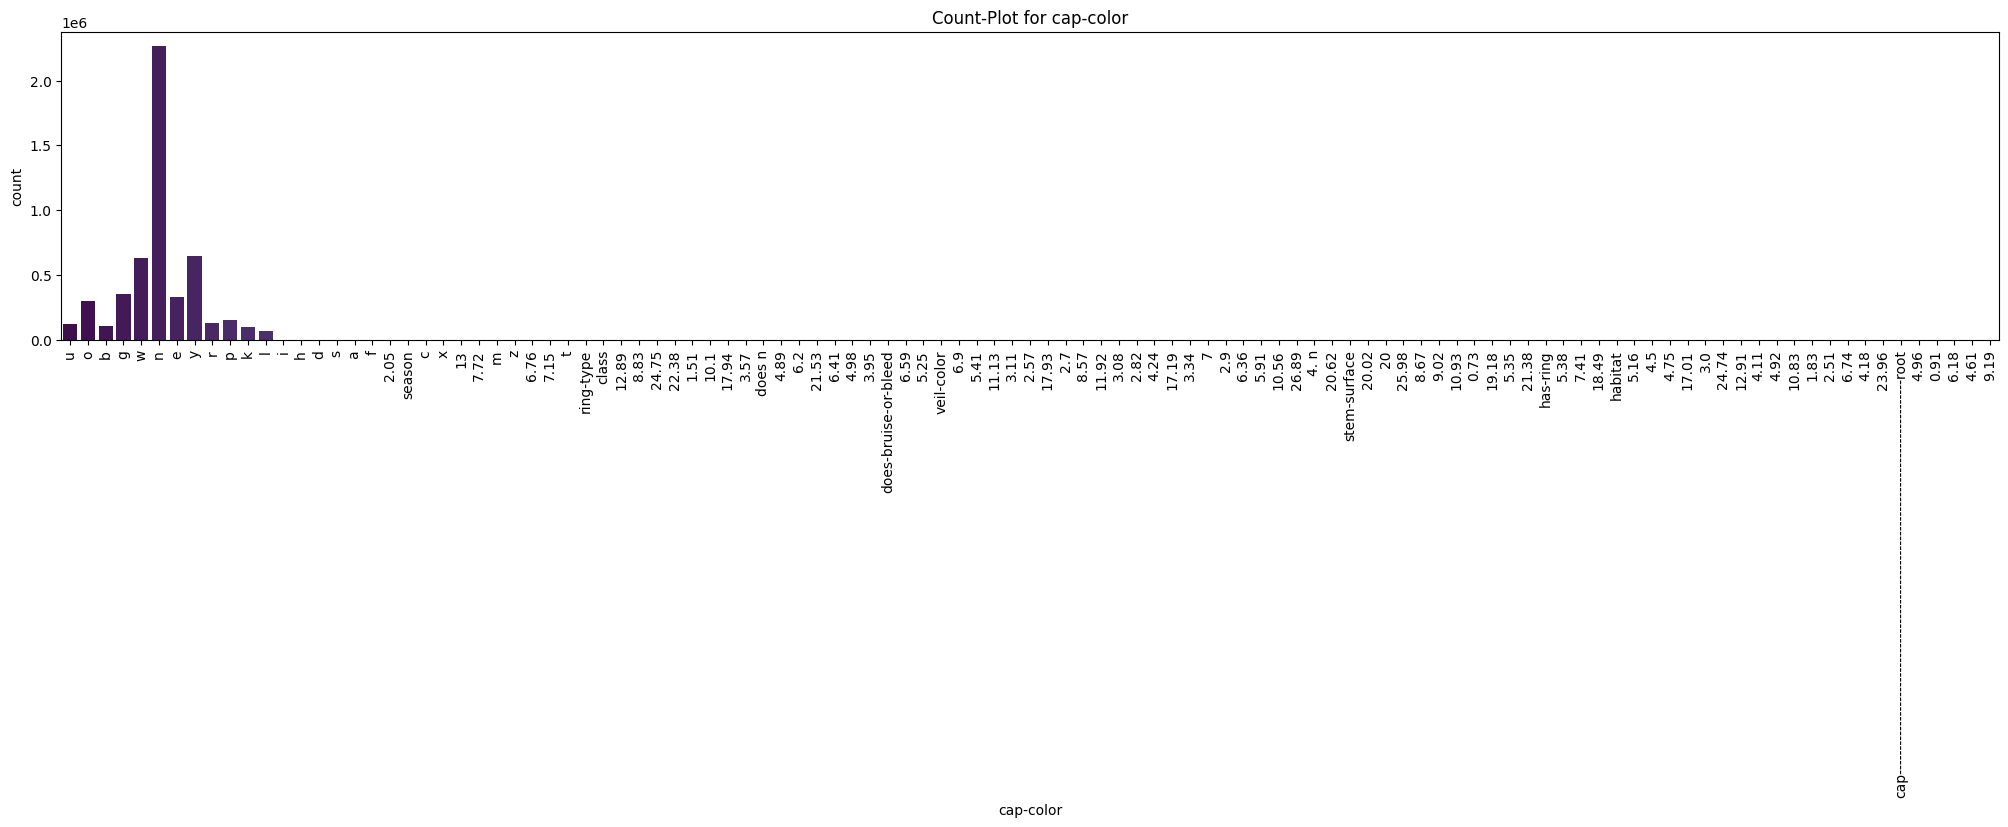

does-bruise-or-bleed


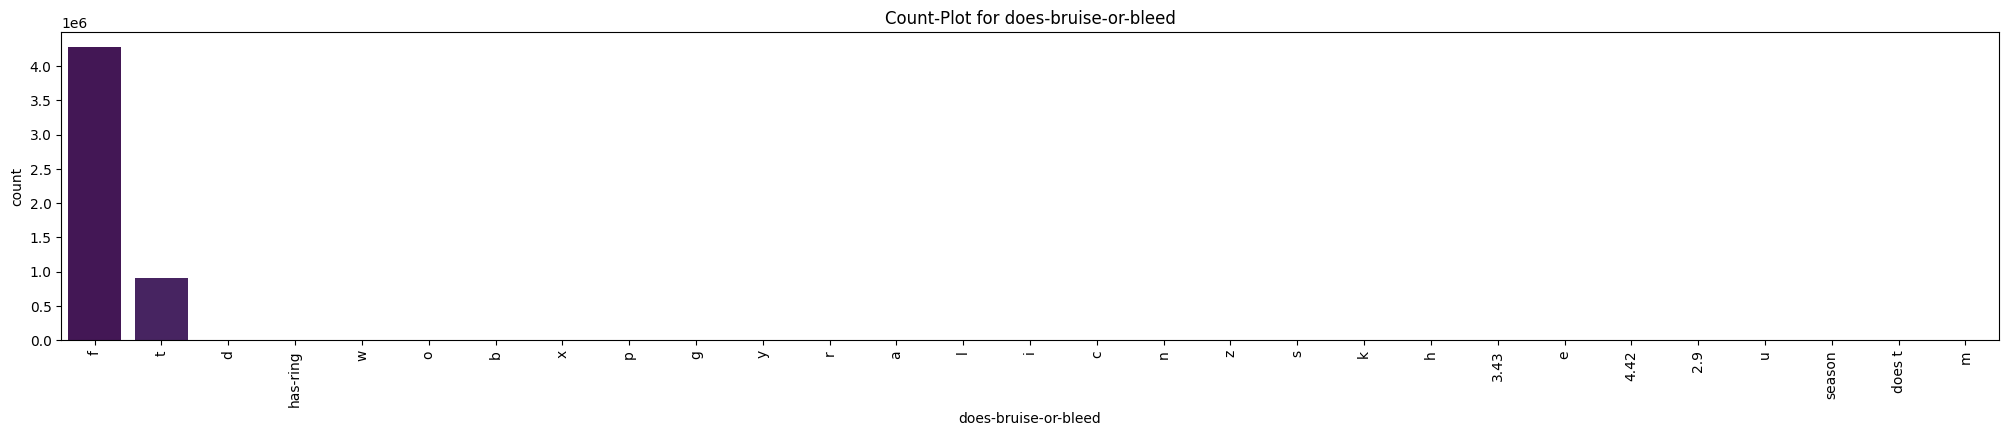

gill-attachment


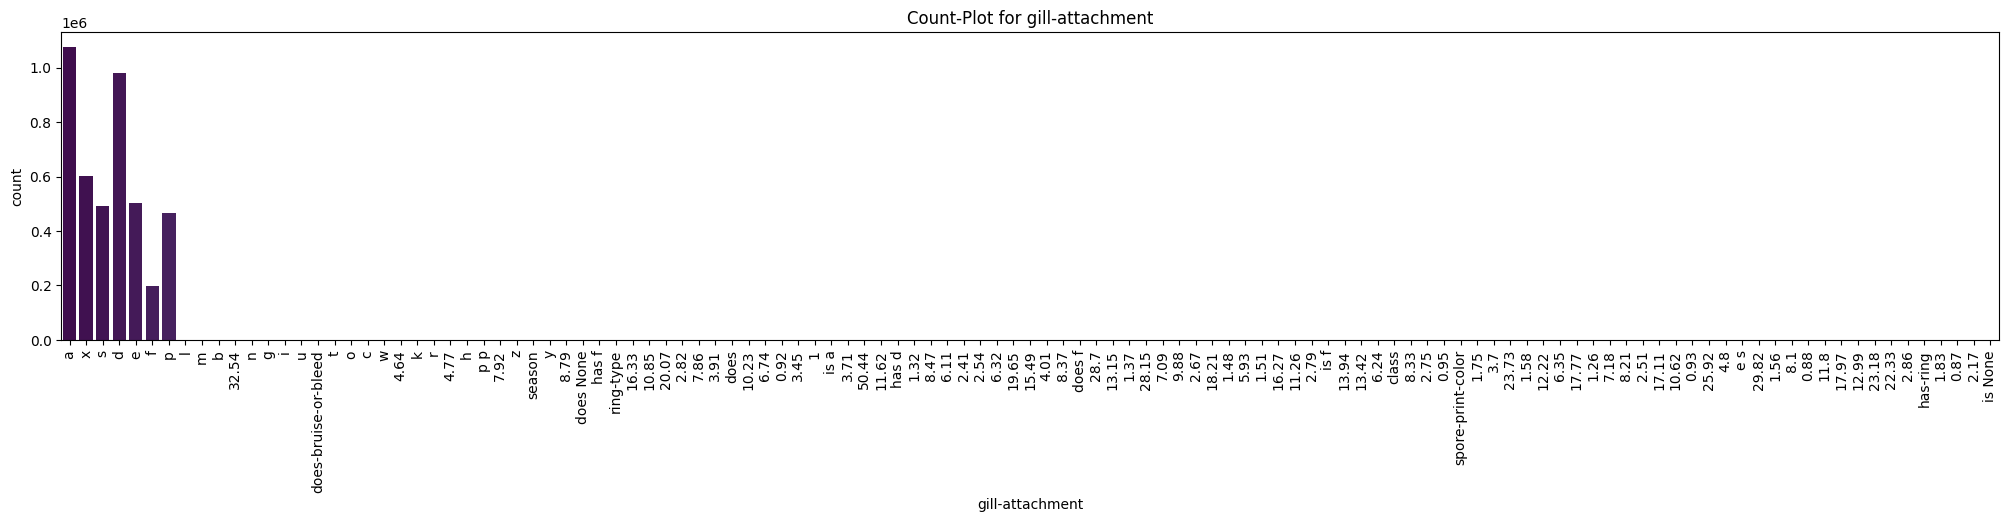

gill-spacing


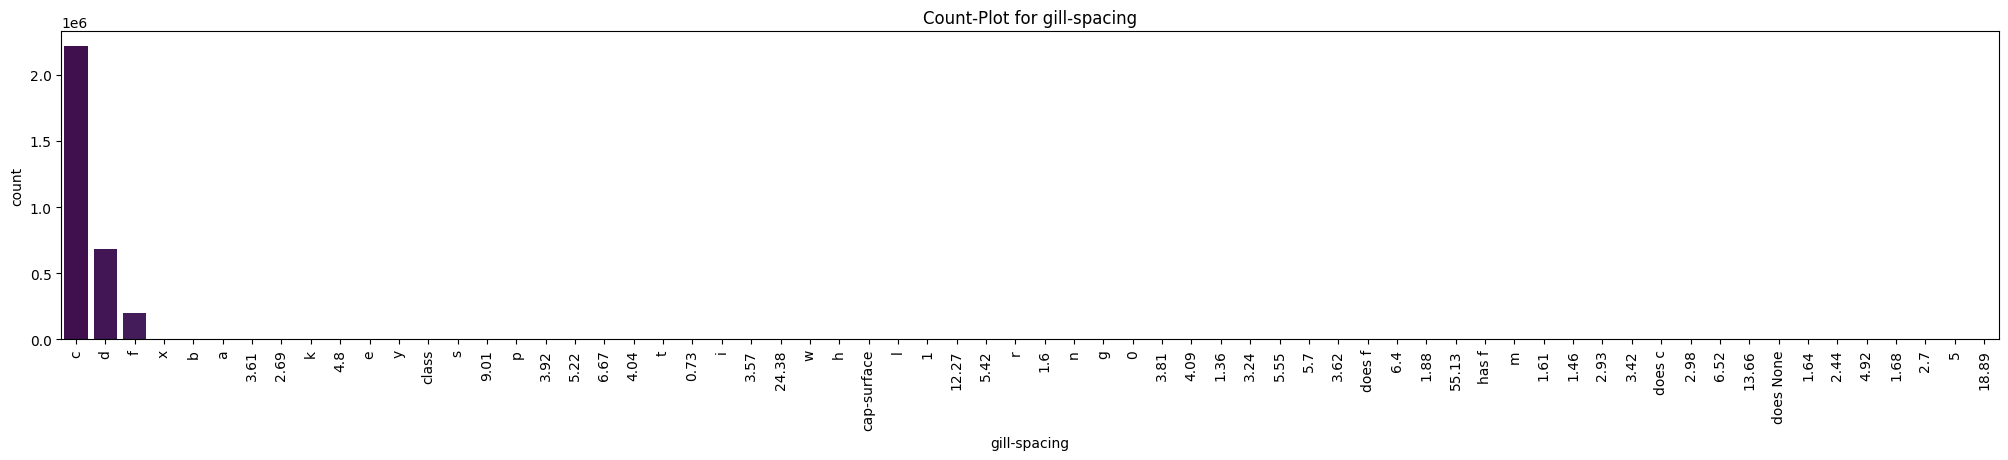

gill-color


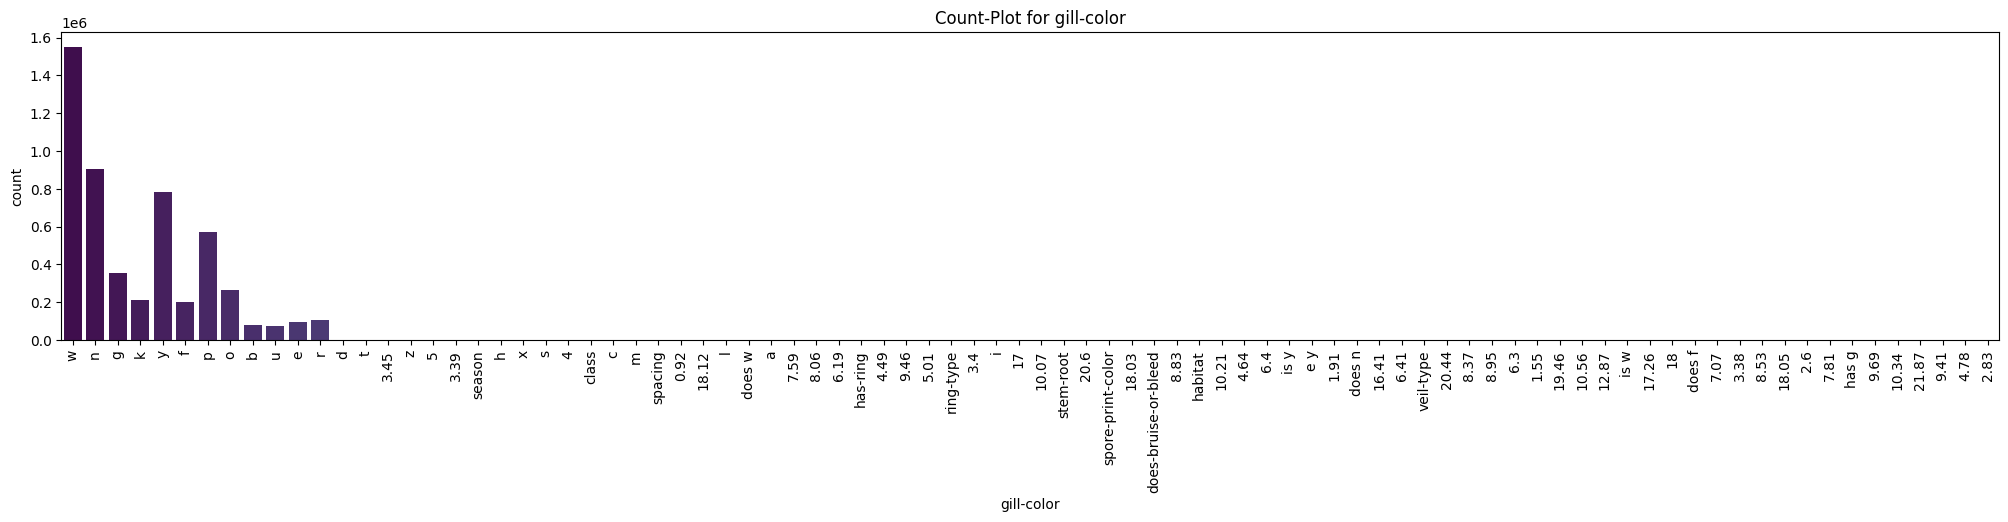

stem-surface


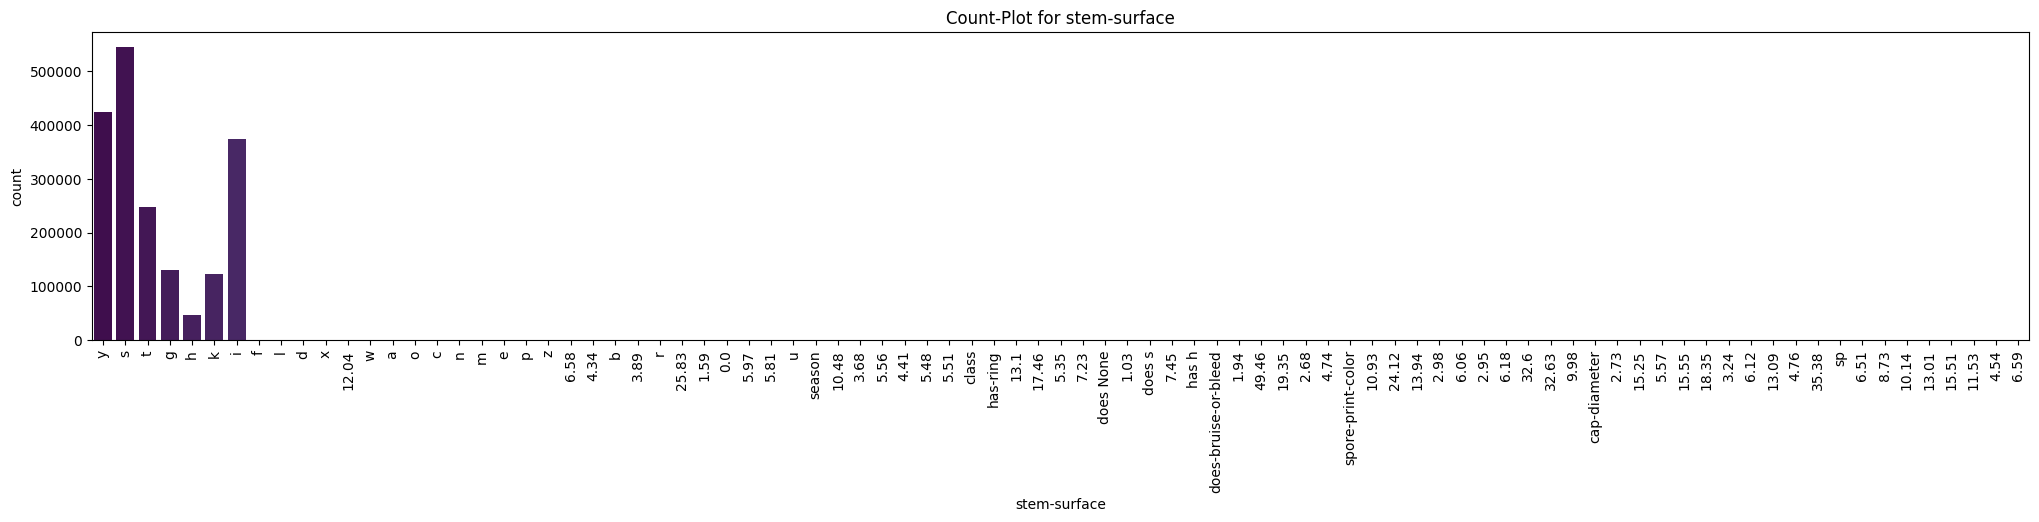

stem-color


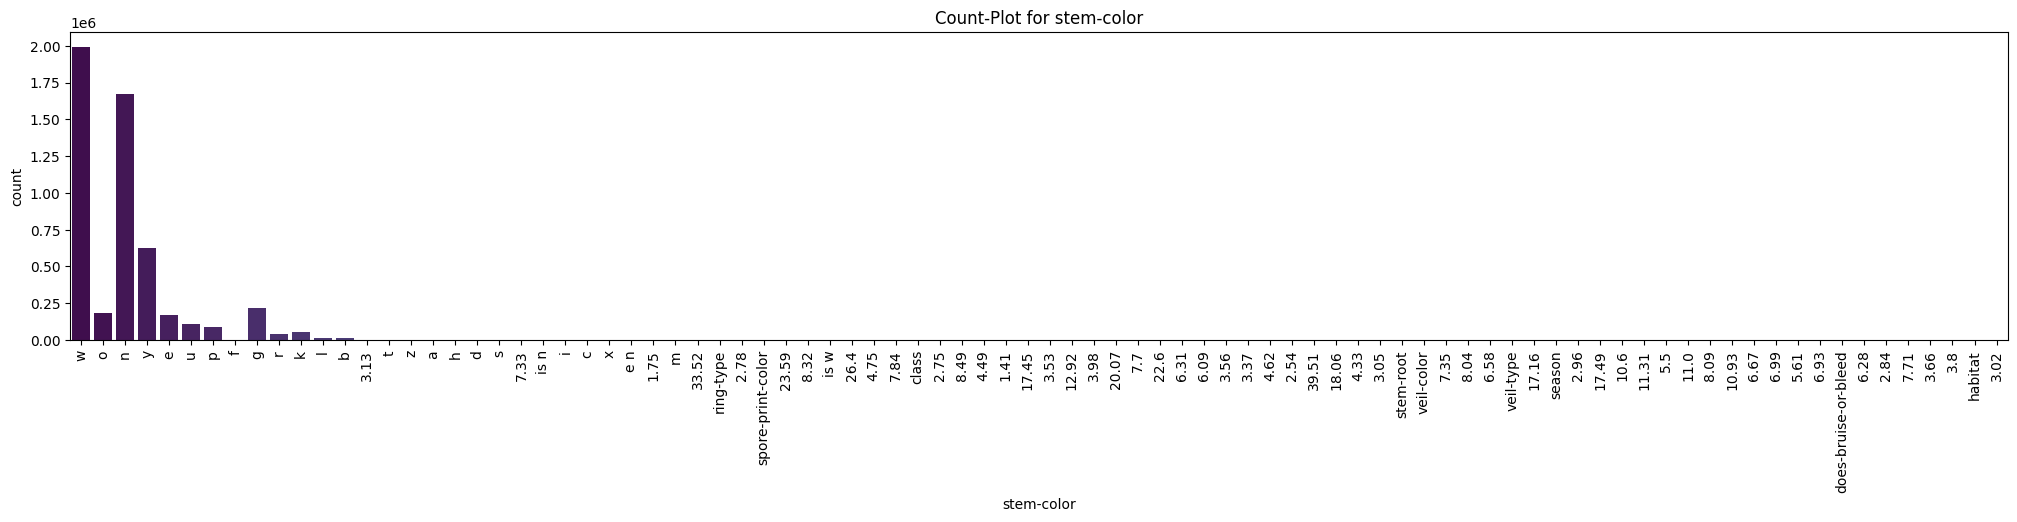

has-ring


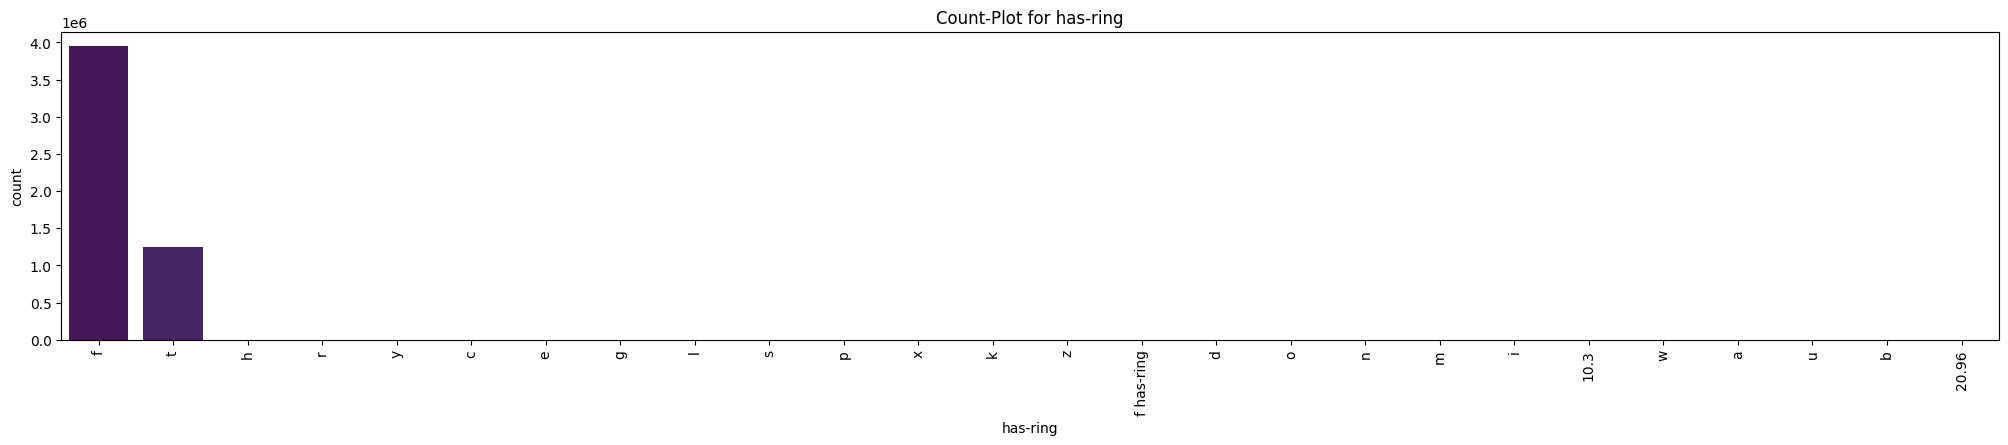

ring-type


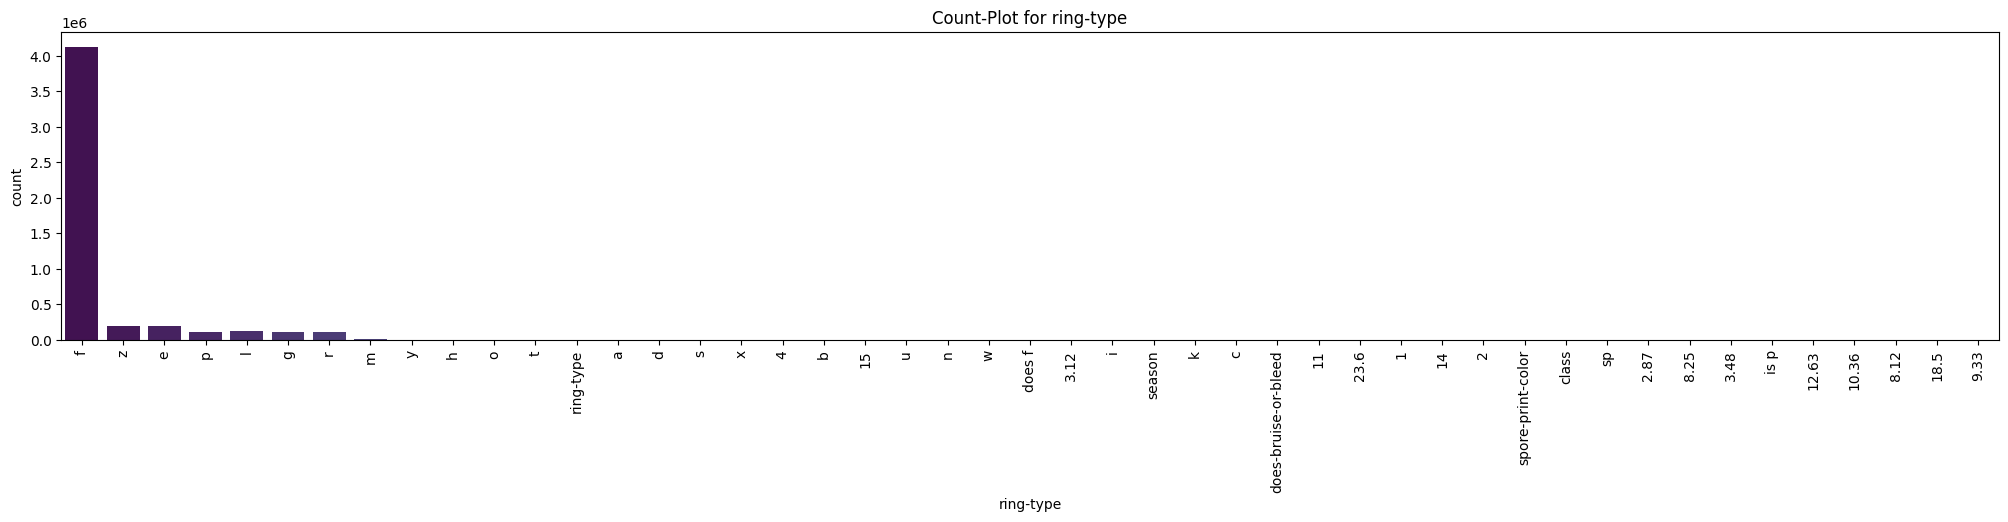

habitat


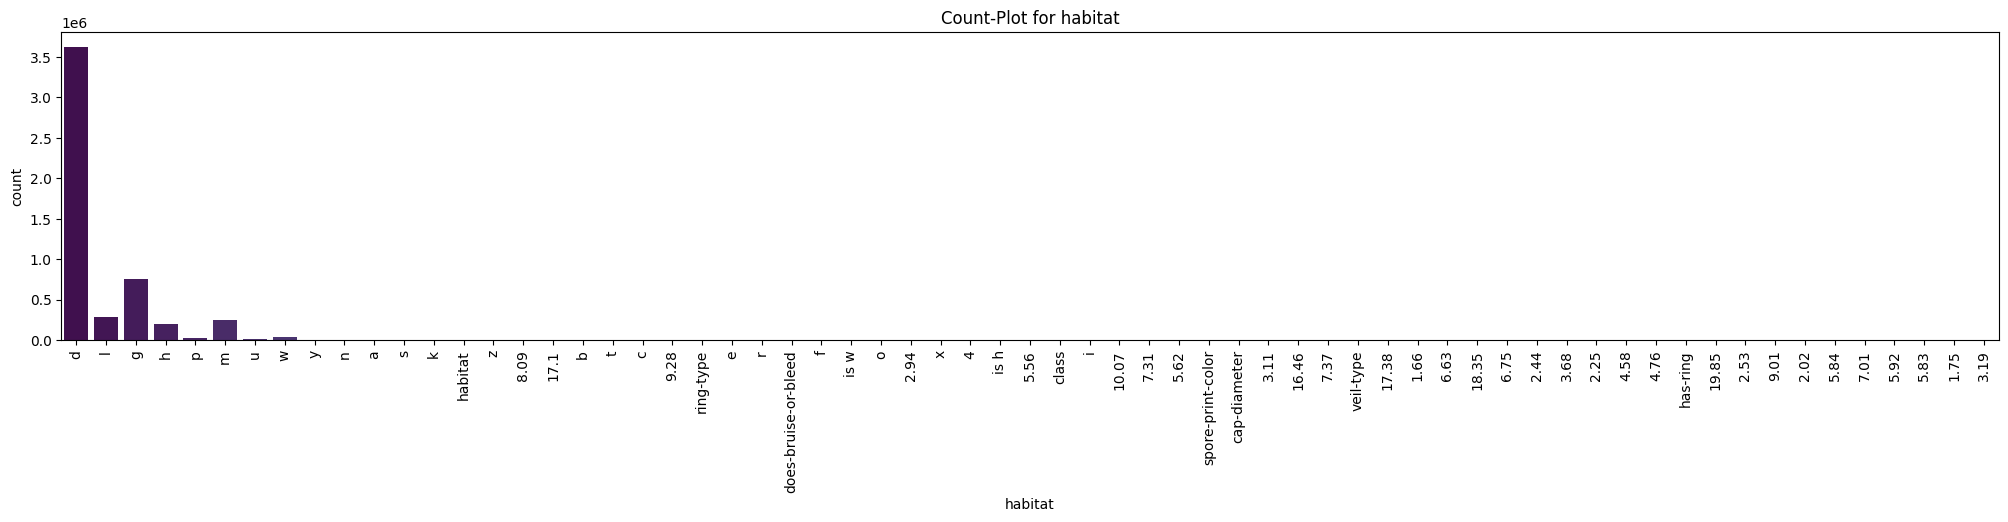

season


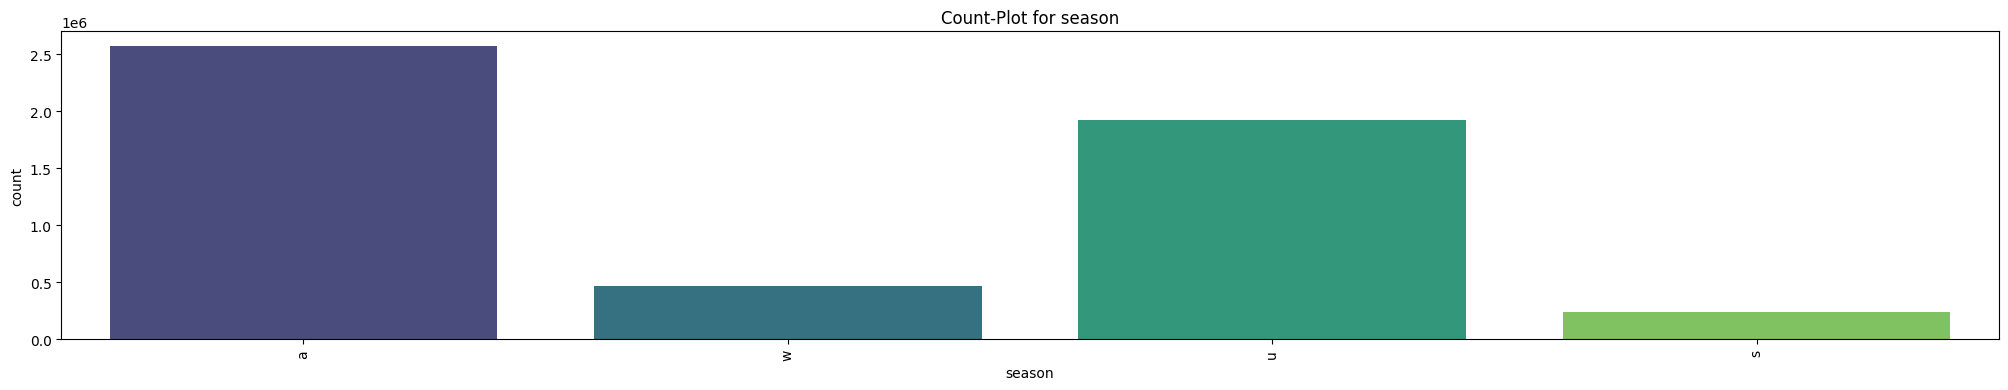

In [33]:
for column in com_data.select_dtypes(include = ['object']).columns:
    print(column)
    
  
    plt.figure(figsize = (25,4))
    sns.countplot(data = com_data, x = com_data[f'{column}'], palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.xticks(rotation = 90)
    plt.title(f'Count-Plot for {column}')

    plt.show()

In [34]:
# Identify categorical columns (typically of type 'object' or 'category')
categorical_columns = com_data.select_dtypes(include=['object']).columns
print(len(categorical_columns))

# Create a dictionary to store unique values for each categorical column
unique_values = {}

for col in categorical_columns:
    unique_values[col] = com_data[col].unique()

# Print the results
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}")
    print()


13
Column: cap-shape
Unique Values: ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06' '3.34' '3.32' '19.76' 'is f' '0.93' 'p f'
 '1.25' '4.55' '11.43' '6' '5.59' '4.41' '3.73' '3.47' '6.75' '51.63'
 '6.52' '9.49' '2.7' '3.15' '5.05' 'cap-diameter' '4.51' '4.86' '0.97'
 '3.94' '6.47' '3.23' '2.02' '1.53' '6.15' '17.89' '0.74' '4.54']

Column: cap-surface
Unique Values: ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23

### **Handling missing values of Numerical/Quantitative  Features**

In [35]:
# Fill missing values in all columns with the respective column medians
num_features_cols = com_data.select_dtypes(include = ['float64'])

for column in num_features_cols:
    
    com_data[column].fillna(com_data[column].median(), inplace = True)



In [36]:
# from sklearn.impute import SimpleImputer

# # Creating an imputer object to replace missing values with the median
# imputer = SimpleImputer(strategy='median')

# # Apply imputer to a single column
# df[columns_names] = imputer.fit_transform(df[[columns_names]])
# print("\nDataFrame after imputing missing values in column 'columns_names':")
# print(df)

In [37]:
com_data.isna().sum()

cap-diameter                  0
cap-shape                    71
cap-surface             1117927
cap-color                    25
does-bruise-or-bleed         18
gill-attachment          873757
gill-spacing            2098030
gill-color                  106
stem-height                   0
stem-width                    0
stem-surface            3302349
stem-color                   59
has-ring                     43
ring-type                215075
habitat                      70
season                        0
dtype: int64

### **Handling missing values And Removing Noise for the Categorical Features**

#### Encoding Categorical Features 

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# from category_encoders import OrdinalEncoder

In [39]:
# cat_features = com_data.select_dtypes(include=['O']).columns

# # Label Encoding
# label_encoder = LabelEncoder()
# for feat in cat_features:
#     com_data[feat] = label_encoder.fit_transform(com_data[feat])

In [40]:
# com_data.head(10)

In [41]:
# cat_features = com_data.select_dtypes(include=['O']).columns
# # One-Hot Encoding
# com_data_encoded = pd.get_dummies(com_data, columns=cat_features)

In [42]:
# Ordinal Encoding
cat_features = com_data.select_dtypes(include=['O']).columns

ordinal_encoder = OrdinalEncoder()
com_data[cat_features] = ordinal_encoder.fit_transform(com_data[cat_features])

In [43]:
com_data.head(10)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.80,85.0,103.0,103.0,9.0,78.0,42.0,82.0,4.51,15.39,NaN,84.0,7.0,24.0,37.0,0.0
1,4.51,105.0,86.0,95.0,9.0,78.0,42.0,69.0,4.79,6.48,85.0,72.0,20.0,46.0,37.0,3.0
2,6.94,85.0,103.0,77.0,9.0,114.0,42.0,82.0,6.85,9.93,77.0,71.0,7.0,24.0,49.0,3.0
3,3.88,85.0,112.0,86.0,9.0,108.0,NaN,58.0,4.16,6.53,NaN,84.0,7.0,24.0,37.0,2.0
4,5.85,105.0,96.0,105.0,9.0,82.0,NaN,82.0,3.37,8.36,NaN,84.0,7.0,24.0,41.0,0.0
5,4.30,105.0,107.0,94.0,9.0,108.0,42.0,69.0,5.91,8.20,NaN,84.0,20.0,46.0,37.0,0.0
6,9.65,97.0,112.0,105.0,9.0,87.0,42.0,66.0,19.07,12.69,77.0,84.0,20.0,23.0,41.0,3.0
7,4.55,105.0,83.0,84.0,9.0,78.0,NaN,84.0,8.31,9.77,NaN,86.0,20.0,46.0,37.0,0.0
8,7.36,85.0,86.0,84.0,9.0,114.0,45.0,82.0,5.77,17.13,NaN,84.0,7.0,24.0,37.0,0.0
9,6.45,105.0,107.0,94.0,9.0,78.0,45.0,82.0,7.13,12.77,NaN,59.0,7.0,24.0,37.0,0.0


In [44]:
com_data.isna().sum()

cap-diameter                  0
cap-shape                    71
cap-surface             1117927
cap-color                    25
does-bruise-or-bleed         18
gill-attachment          873757
gill-spacing            2098030
gill-color                  106
stem-height                   0
stem-width                    0
stem-surface            3302349
stem-color                   59
has-ring                     43
ring-type                215075
habitat                      70
season                        0
dtype: int64

In [45]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194909 entries, 0 to 5194908
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             float64
 2   cap-surface           float64
 3   cap-color             float64
 4   does-bruise-or-bleed  float64
 5   gill-attachment       float64
 6   gill-spacing          float64
 7   gill-color            float64
 8   stem-height           float64
 9   stem-width            float64
 10  stem-surface          float64
 11  stem-color            float64
 12  has-ring              float64
 13  ring-type             float64
 14  habitat               float64
 15  season                float64
dtypes: float64(16)
memory usage: 634.1 MB


#### Filling Missing Values

In [46]:
from sklearn.impute import KNNImputer
# from sklearn.preprocessing import QuantileTransformer


In [47]:
# # Identify numeric columns
# cat_features = com_data.select_dtypes(include=['float64']).columns    

# # Initialize the KNNImputer
# imputer = KNNImputer(n_neighbors=5)

# com_data[cat_features] = imputer.fit_transform(com_data[cat_features])



In [48]:
# com_data.isna().sum()

In [49]:
# com_data.info()

In [50]:
# com_data.describe(include = 'all')

#### Removing Noise 

In [51]:

# # Function to remove noise
# def remove_noise(df, noise_th=200):
    
#     cat_feats = df.select_dtypes(include=['O']).columns

#     for feat in cat_feats:
#         # Calculate the value counts for the feature
#         value_counts = df[feat].value_counts()
        
#         # Identify categories that are considered noise
#         noise_categories = value_counts[value_counts < noise_th].index
        
#         # Replace noise categories with 'noise'
#         df[feat] = df[feat].replace(noise_categories, 'noise')

# #     # Optionally, remove rows where any feature has the value 'noise'
# #     df_cleaned = df[~df.isin(['noise']).any(axis=1)]

#     return df

# cleaned_com_data = remove_noise(com_data)
# cleaned_com_data.head()

In [52]:
# # Identify categorical columns (typically of type 'object' or 'category')
# categorical_columns = com_data.select_dtypes(include=['object']).columns
# print(len(categorical_columns))

# # Create a dictionary to store unique values for each categorical column
# unique_values = {}

# for col in categorical_columns:
#     unique_values[col] = com_data[col].unique()

# # Print the results
# for col, values in unique_values.items():
#     print(f"Column: {col}")
#     print(f"Unique Values: {values}")
#     print()

In [53]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import QuantileTransformer


In [54]:
# ## since there are too many missing values in the numerical features we will use KNN to fill missing values 
# n_features = com_data.select_dtypes(include=['float64']).columns    

# # Initialize the KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# com_data[n_features] = imputer.fit_transform(com_data[n_features])


In [55]:
# com_data[n_features].isna().sum()

### Removing Outliers